[*********************100%***********************]  1 of 1 completed


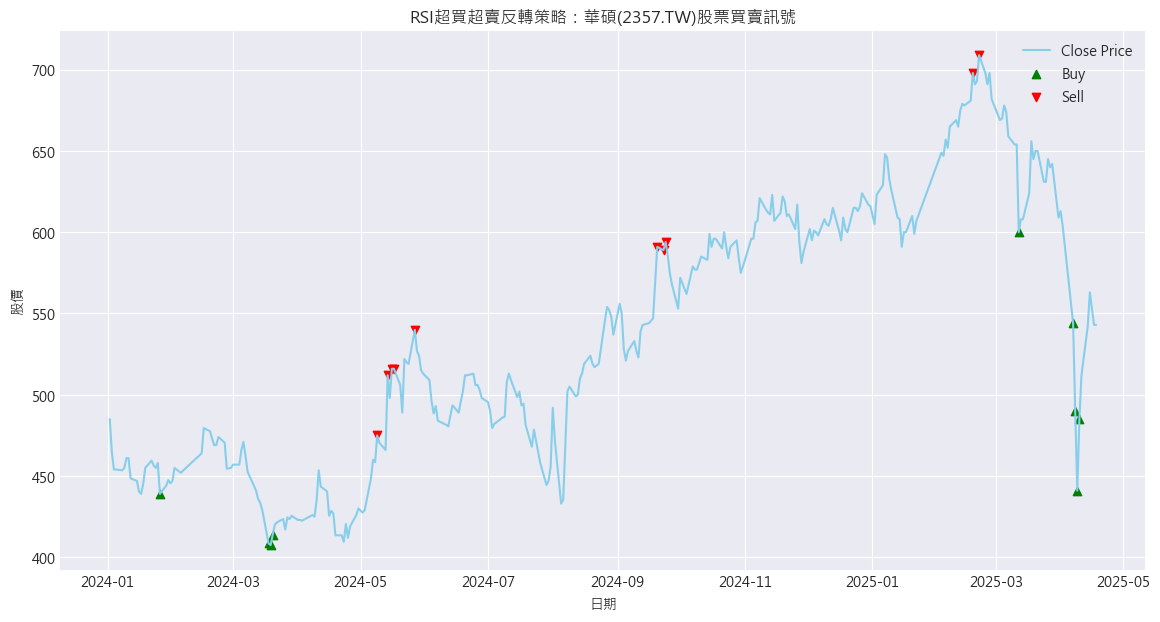

In [17]:
# 策略一：RSI超買超賣反轉策略
import yfinance as yf
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定為微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號無法顯示的問題

# 抓取華碩股價資料
df = yf.download("2357.TW", start="2024-01-01", end=datetime.now().strftime("%Y-%m-%d"), auto_adjust=False)

# 資料前處理(檢查 Close 欄位是否存在且不是全為 NaN)
if 'Close' not in df.columns:
    raise ValueError("資料中找不到 'Close' 欄位")
if df['Close'].isnull().all().item():
    raise ValueError("'Close' 欄位全部是缺值，無法進行分析")

# 補齊收盤價(將收盤價轉為一維 numpy array，並處理缺值)
close_prices = df['Close'].ffill().to_numpy(dtype='float64').ravel()

# 計算 RSI
rsi = talib.RSI(close_prices, timeperiod=14)

# 放入 DataFrame
df['RSI'] = rsi
df['Signal'] = 0
df.loc[df['RSI'] > 70, 'Signal'] = -1  # (超買)賣出訊號
df.loc[df['RSI'] < 30, 'Signal'] = 1   # (超賣)買進訊號

# 畫圖
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='skyblue')
plt.scatter(df.index[df['Signal'] == 1], df[df['Signal'] == 1]['Close'], label='Buy', color='green', marker='^')
plt.scatter(df.index[df['Signal'] == -1], df[df['Signal'] == -1]['Close'], label='Sell', color='red', marker='v')
plt.title("RSI超買超賣反轉策略：華碩(2357.TW)股票買賣訊號")
plt.xlabel("日期")
plt.ylabel("股價")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


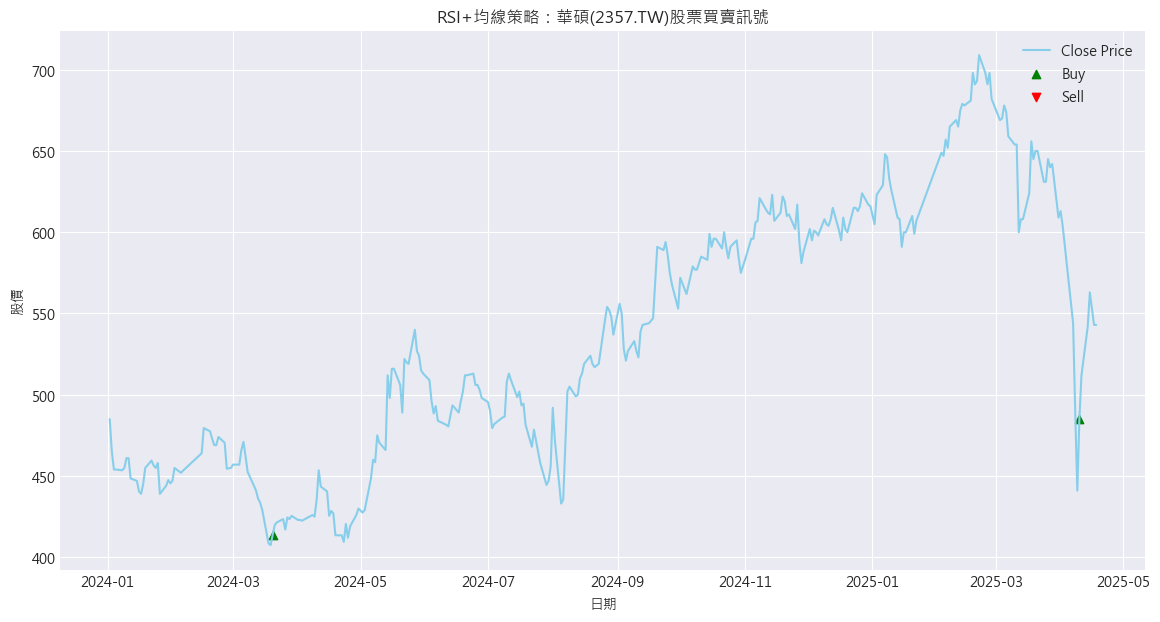

In [22]:
# 策略二：RSI+均線策略
import yfinance as yf
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定為微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號無法顯示的問題

# 抓取華碩股價資料
df = yf.download("2357.TW", start="2024-01-01", end=datetime.now().strftime("%Y-%m-%d"), auto_adjust=False)

# 資料前處理(檢查 Close 欄位是否存在且不是全為 NaN)
if 'Close' not in df.columns:
    raise ValueError("資料中找不到 'Close' 欄位")
if df['Close'].isnull().all().item():
    raise ValueError("'Close' 欄位全部是缺值，無法進行分析")

# 補齊收盤價(將收盤價轉為一維 numpy array，並處理缺值)
close_prices = df['Close'].ffill().to_numpy(dtype='float64').ravel()

# RSI 與 RSI 均線
df['RSI'] = talib.RSI(close_prices, timeperiod=14)
df['RSI_MA'] = df['RSI'].rolling(window=5).mean()

# 產生交易訊號
df['Signal'] = 0
df.loc[(df['RSI'] < 30) & (df['RSI'] > df['RSI_MA']), 'Signal'] = 1   # 買進訊號
df.loc[(df['RSI'] > 70) & (df['RSI'] < df['RSI_MA']), 'Signal'] = -1  # 賣出訊號

# 顯示前幾筆訊號
#print(df[df['Signal'] != 0][['Close', 'RSI', 'RSI_MA', 'Signal']].head())

# 繪圖
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='skyblue')
plt.scatter(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], label='Buy', color='green', marker='^')
plt.scatter(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], label='Sell', color='red', marker='v')
plt.title("RSI+均線策略：華碩(2357.TW)股票買賣訊號")
plt.xlabel("日期")
plt.ylabel("股價")
plt.legend()
plt.grid(True)
plt.show()